# 9. Desviaciones estándar y Ángulos

Para cualquier vector $\mathbf{x}$ podemos definir el vector $\tilde{\mathbf{x}} = \mathbf{x} - avg(\mathbf{x})\mathbf{1}$, mismo que cumple con la propiedad de que $avg(\tilde{\mathbf{x}})=0$ . A este vector se le llama *vector de-meaned* lo cual significa que le quitamos su promedio. Este vector nos va a ser muy útil para ver cómo se distribuyen los elementos del vector del valor promedio del vector. 

Así pues, vamos a definir también la *desviación estándar* de un $n$-vector $\mathbf{x}$ como el RMS del vector de-meaned:

$$
std(\mathbf{x}) = \displaystyle\sqrt{\frac{(x_{0}-avg(\mathbf{x}))^2 + (x_{1}-avg(\mathbf{x}))^2 + \cdots + (x_{n-1}-avg(\mathbf{x}))^2 }{n}} = \displaystyle\frac{|| \mathbf{x} - (\mathbf{1}^{T}\mathbf{x}/n)\mathbf{1} ||}{\sqrt{n}}
$$

La desviación estándar de un vector $\mathbf{x}$ nos dice la cantidad típica por la cual cada una de las entradas se desvía del promedio del vector. 

**Por Demostrar:** $std(\mathbf{x}) = 0$ si y solamente si $\mathbf{x} = \alpha \mathbf{1}$

Notemos que si $std(\mathbf{x})\approx 0$ entonces las entradas son similares.

Ahora, consideremos el vector $\mathbf{x}^{T} = [1,-2,3,2]$ con lo cual obtenemos $avg(\mathbf{x})=1$. El vector de-meaned es $\tilde{\mathbf{x}}^{T} = [0,-3,2,1]$ y $std(\mathbf{x}) = 1.87$

In [ ]:
import numpy as np

In [ ]:
x = np.array([1,-2,3,2])

In [ ]:
np.mean(x)

1.0

In [ ]:
x_t = x - np.mean(x)*np.array([1,1,1,1])

In [ ]:
np.linalg.norm(x_t)/np.sqrt(len(x_t))

1.8708286933869707

In [ ]:
np.std(x)

1.8708286933869707

Es usual encontrar en otros materiales que se refieren al promedio como $\mu$ y la desviación estándar por $\sigma$ y además quedan expresados como:

$$
\mu = \frac{1}{n}\mathbf{1}^{T} \mathbf{x}, \qquad \sigma = \displaystyle\frac{|| \mathbf{x} - \mu \mathbf{1}||}{\sqrt{n-1}}
$$

**Promedio, RMS y desviación estándar.** Hay una relación que estas tres cantidad cumplen

$$
rms(\mathbf{x})^2 = avg(x)^2 + std(x)^2
$$

## 9.1 Un ejemplo en el uso de desviación estándar.

**Retorno promedio y riesgo de inversión**. Supongamos que un vector $\mathbf{x}$  representa una serie de tiempo del retorno de una inversión, expresado como un porcentaje, en $n$ períodos de tiempo. El promedio de los valor de la serie de tiempo nos darán el valor esperado de procentaje de retorno de inversión mientras que la desviación será una medida de riesgo para nuestra inversión. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
a = np.array([0.1]*50)
b = np.sin(np.linspace(0,4,50)) + np.random.uniform(-0.1,0.1,50)
c = np.cos(np.linspace(2,6,50)) + np.random.uniform(-0.1,0.1,50)
d = [i - np.random.uniform(0,0.8) for i in np.linspace(0,1,50)]

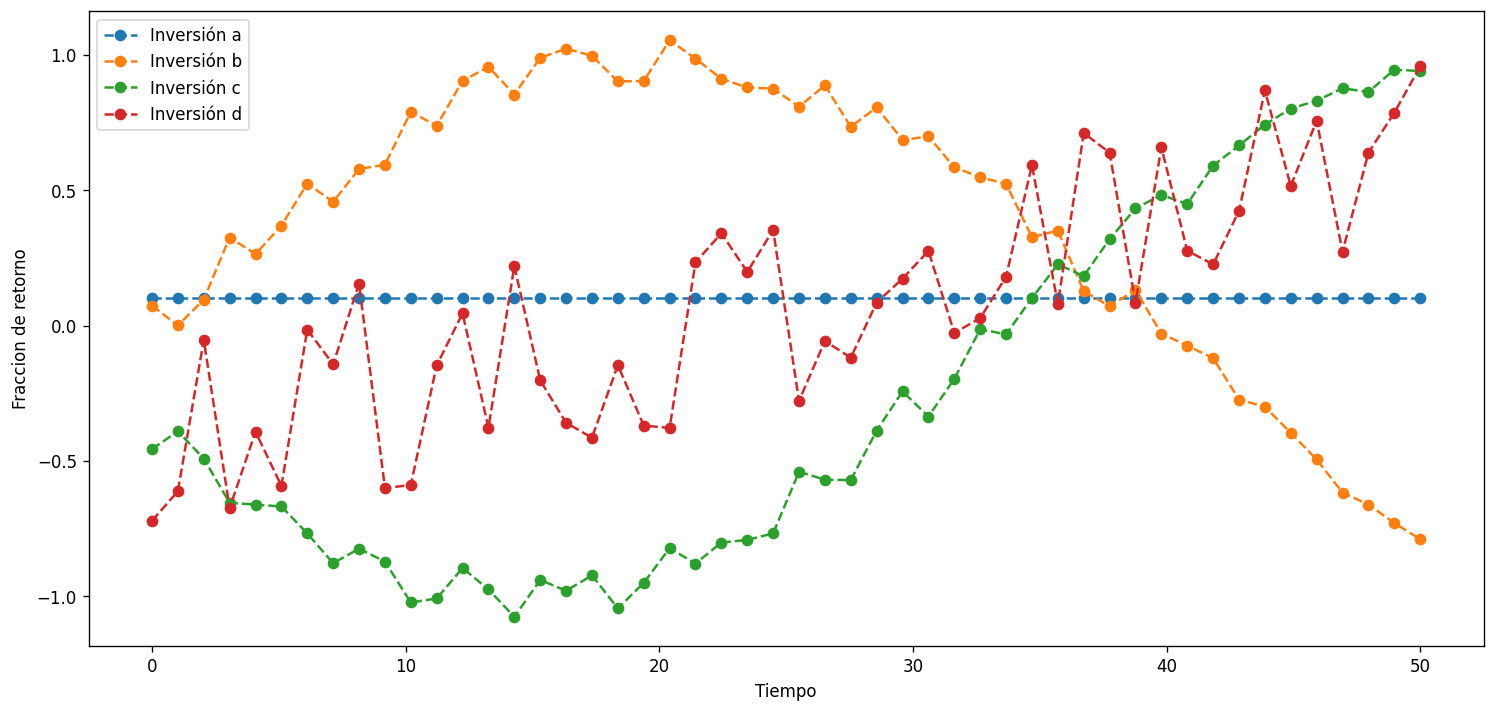

In [ ]:
fig,ax  = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),a, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),b, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),c, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),d, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [ ]:
I = np.array([a,b,c,d])

In [ ]:
M = np.array([np.mean(x) for x in I])
S = np.array([np.std(x) for x in I])

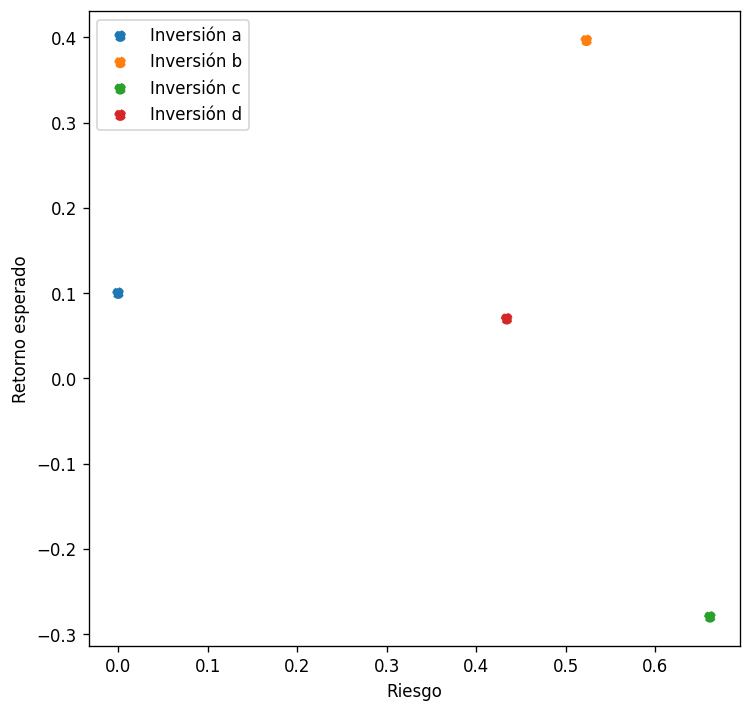

In [ ]:
fig,ax  = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(S[0],M[0], linestyle='dashed',label='Inversión a')
ax.scatter(S[1],M[1], linestyle='dashed',label='Inversión b')
ax.scatter(S[2],M[2], linestyle='dashed',label='Inversión c')
ax.scatter(S[3],M[3], linestyle='dashed',label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()

**Estandarización**. Para cerrar presentaremos la estandarización de un vector $\mathbf{x}$. Esto es básicamente generar un nuevo vector en donde las entradas se llaman _z-scores_:

$$
\mathbf{z} = \frac{1}{std(\mathbf{x})} (\mathbf{x} - avg(\mathbf{x})\mathbf{1})
$$

Básicamente en este vector si la entrada $z_{1} = 1.7$ esto significa que $x_{1}$ está 1.7 desviaciones estándar por arriba del promedio de entradas del vector $\mathbf{x}$.

# 9.2 Ángulos

En el caso de los ángulos seremos muy breves. Es posible calcular el ángulo que existe entre dos vectores y este está dado por la relación

$$
\cos{(\theta)} = \displaystyle\frac{a^T b}{||a||\, ||b||}
$$

Notemos que también será posible expresar el producto interno en términos del ángulo entre dos vectores.

$$
a^T b = ||a||\, ||b||\, \cos{(\theta)}
$$

**Coeficiente de correlación.** Si tenemos dos vectores $a$ y $b$ entonces podemos construir

$$
\tilde{a} = a - avg(a)\mathbf{1} \qquad \tilde{b} = b - avg(b)\mathbf{1}
$$

Entonces se define el coeficiente de correlación como:

$$
\rho = \displaystyle\frac{\tilde{a}^{T}\tilde{b}}{||\tilde{a}||\,||\tilde{b}||}
$$

In [ ]:
def demean(a):
    return a - np.mean(a)*np.array([1]*len(a))

In [ ]:
def correlacion(a,b):
    a,b = demean(a),demean(b)
    return (a@b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
a = np.sin(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)
b = np.sin(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)

In [ ]:
print('La correlación entre a y b es',correlacion(a,b))

La correlación entre a y b es 0.9053699539378103


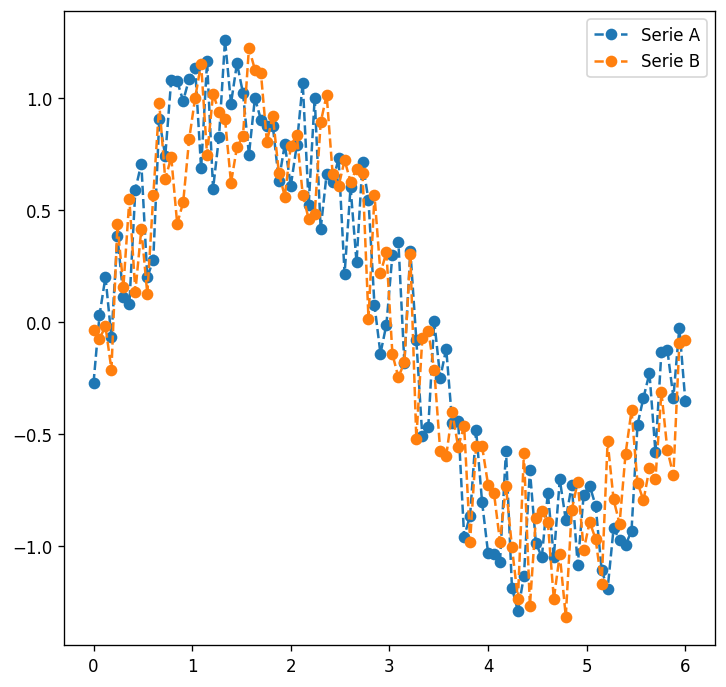

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

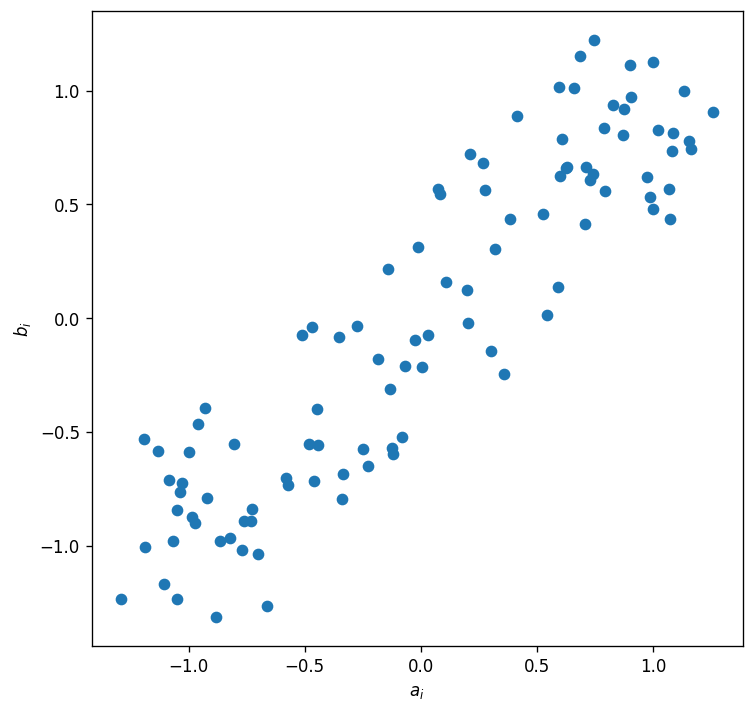

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

In [ ]:
a = np.sin(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)
b = np.cos(np.linspace(2,7,100)) + np.random.uniform(-0.4,0.4,100)

In [ ]:
print('La correlación entre a y b es',correlacion(a,b))

La correlación entre a y b es -0.8779892590065292


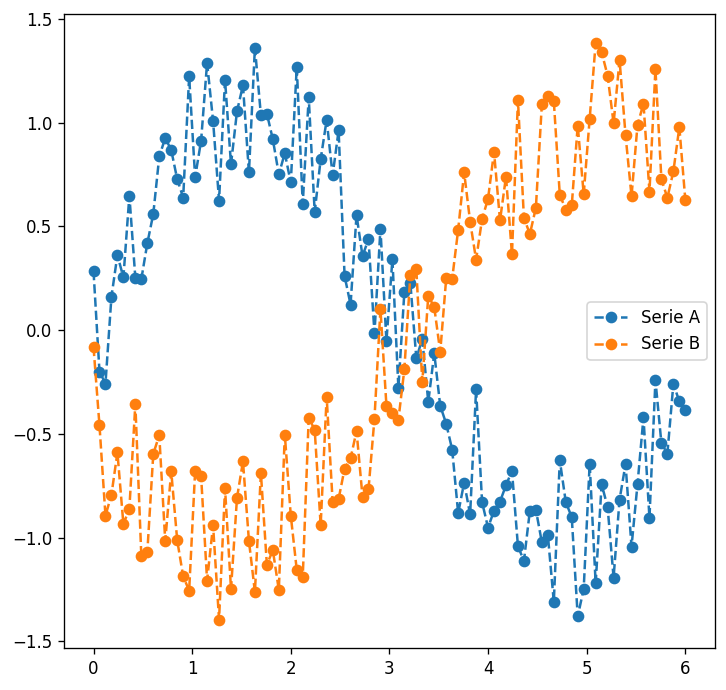

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

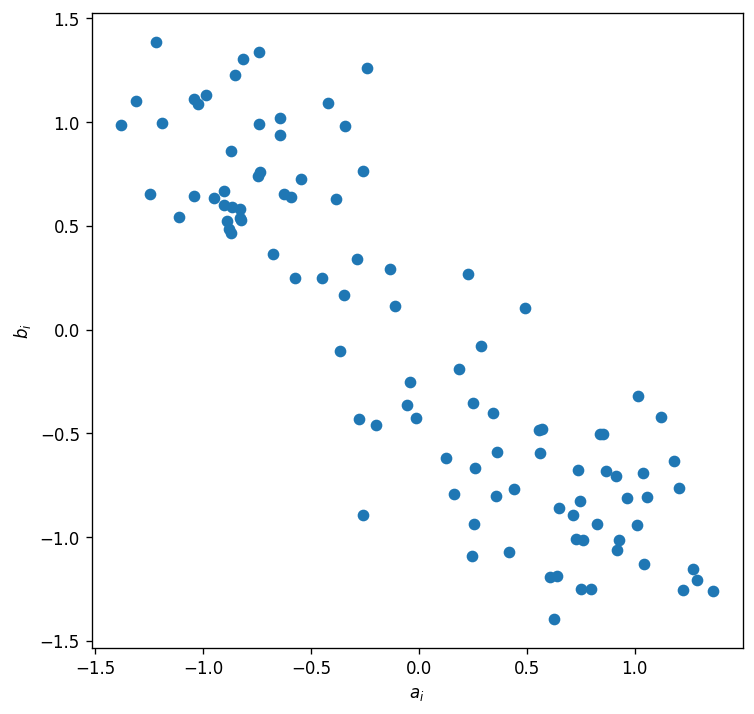

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

In [ ]:
a = np.cos(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)
b = np.exp(np.linspace(2,7,100)) + np.random.uniform(-0.4,0.4,100)

In [ ]:
print('La correlación entre a y b es',correlacion(a,b))

La correlación entre a y b es 0.35489605876045177


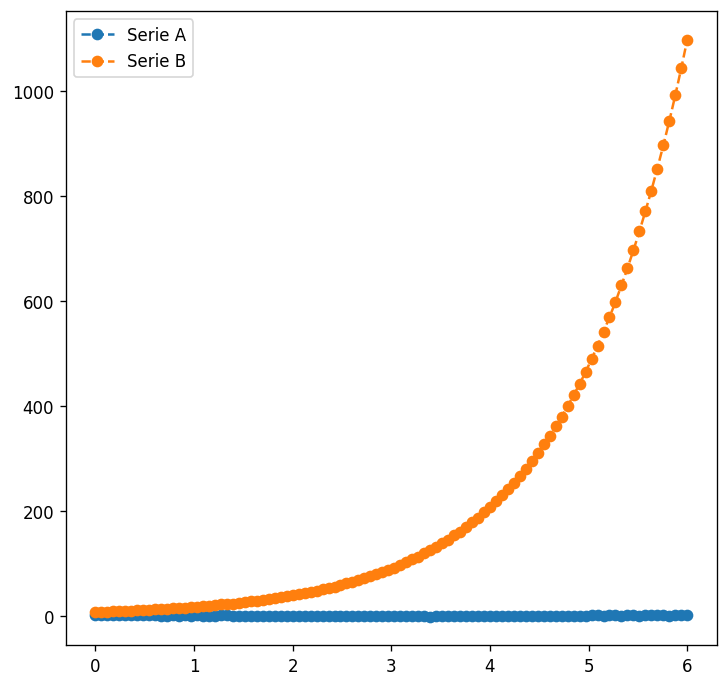

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

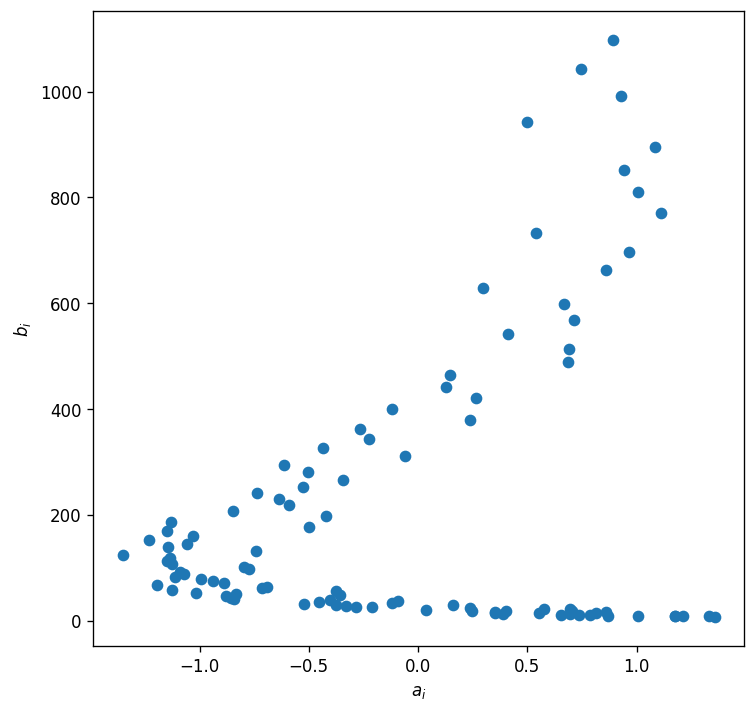

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>